Dataset Link: https://www.kaggle.com/datasets/ananthr1/weather-prediction

### Predicting Weather Condition

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/weather_dataset.csv')

# Drop the 'date' column since it's not needed for prediction
df = df.drop(columns=['date'])

print("First five rows of the dataset after dropping 'date':")
print(df.head(), "\n")

# Separate features (X) and target variable (y)
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

First five rows of the dataset after dropping 'date':
   precipitation  temp_max  temp_min  wind  weather
0            0.0      12.8       5.0   4.7  drizzle
1           10.9      10.6       2.8   4.5     rain
2            0.8      11.7       7.2   2.3     rain
3           20.3      12.2       5.6   4.7     rain
4            1.3       8.9       2.8   6.1     rain 



In [ ]:
print(y.head())

0    drizzle
1       rain
2       rain
3       rain
4       rain
Name: weather, dtype: object


In [ ]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy * 100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 73.03754266211604

Classification Report:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.23      0.20      0.21        25
        rain       0.90      0.88      0.89       120
        snow       0.36      0.50      0.42         8
         sun       0.78      0.76      0.77       131

    accuracy                           0.73       293
   macro avg       0.45      0.47      0.46       293
weighted avg       0.74      0.73      0.74       293

Confusion Matrix:
[[  0   1   0   0   8]
 [  2   5   4   0  14]
 [  1   0 105   7   7]
 [  0   0   4   4   0]
 [ 11  16   4   0 100]]


In [ ]:
print(X_test.iloc[0], y_test.iloc[0])

precipitation     0.0
temp_max         23.9
temp_min         11.1
wind              2.7
Name: 892, dtype: float64 sun


In [ ]:
y_t = clf.predict([[0.0, 25.3, 11.1, 7.3]])
y_t[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'sun'

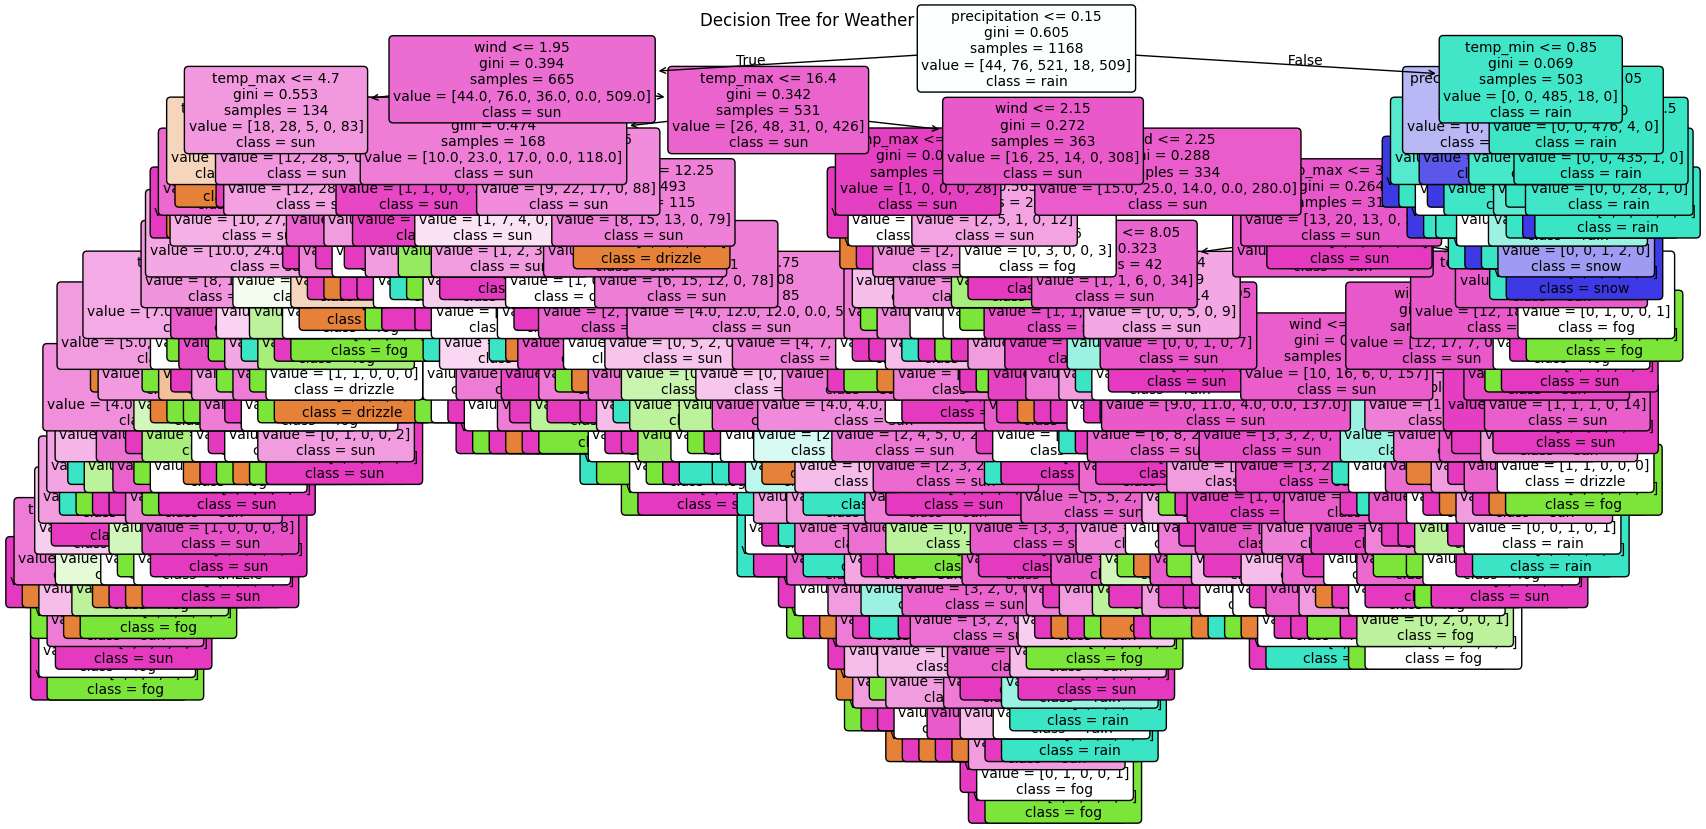

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=clf.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Weather Prediction")
plt.show()

### Predicting Precipitation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/weather_dataset.csv')

df = df.drop(columns=['date'])

print("First five rows of the dataset after dropping 'date':")
print(df.head(), "\n")

# Separate features (X) and target variable (y)
# Features: temp_max, temp_min, wind, weather
# Target: precipitation
X = df[['temp_max', 'temp_min', 'wind', 'weather']]
y = df['precipitation']

# Convert categorical 'weather' column to numerical values using one-hot encoding
X = pd.get_dummies(X, columns=['weather'], drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

First five rows of the dataset after dropping 'date':
   precipitation  temp_max  temp_min  wind  weather
0            0.0      12.8       5.0   4.7  drizzle
1           10.9      10.6       2.8   4.5     rain
2            0.8      11.7       7.2   2.3     rain
3           20.3      12.2       5.6   4.7     rain
4            1.3       8.9       2.8   6.1     rain 



In [ ]:
X.head()

,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,12.8,5.0,4.7,True,False,False,False,False
1,10.6,2.8,4.5,False,False,True,False,False
2,11.7,7.2,2.3,False,False,True,False,False
3,12.2,5.6,4.7,False,False,True,False,False
4,8.9,2.8,6.1,False,False,True,False,False


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

Mean Absolute Error (MAE): 3.131863581960388
Mean Squared Error (MSE): 27.73527205612197
R-squared Score (R2): 0.28561168376118984
